# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.dtypes
# City and State are objects whose elements are strings with the name of each city and state 
# Temperature is float64 whose elements are the temperatures of each city

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
temp[temp["State"] == "New York"]

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
temp[temp["State"] == "New York"]["Temperature"].mean()
#Same as np.mean(temp[temp["State"] == "New York"]["Temperature"])

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
temp[temp["Temperature"] > 15][["City", "State"]]

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
list(temp[temp["Temperature"] > 15]["City"])

['NYC', 'Hartford', 'Treton', 'Newark']

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
list(temp[(temp["Temperature"] > 15) & (temp["Temperature"] < 20)]["City"])

['NYC', 'Hartford']

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
for state in temp["State"].unique():
    mean = temp[temp["State"] == state]["Temperature"].mean()
    std = temp[temp["State"] == state]["Temperature"].std()
    print(f" {state} ---  Mean temperature: {round(mean,2)}, Standard deviation: {round(std,2)}") 
    

 New York ---  Mean temperature: 10.74, Standard deviation: 8.13
 Connecticut ---  Mean temperature: 15.83, Standard deviation: 1.96
 New Jersey ---  Mean temperature: 21.11, Standard deviation: 1.57


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
employee.dtypes
#Name, Department, Education, Gender, Title are objects with strings in them
#Years and salary are integers

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

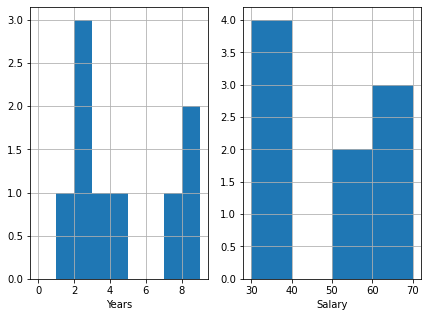

In [13]:
#Only the ones with numerical values
plt.figure(figsize=(7,5))
plt.subplot(1,2, 1)
plt.xlabel("Years")
plt.grid(True)
plt.hist( employee["Years"],bins=range(0,10,1) )
plt.subplot(1,2, 2)
plt.xlabel("Salary")
plt.grid(True)
plt.hist( employee["Salary"],bins=range(30,80,10) )
plt.show()
# Both histobrams show 2 groups of higher and lower values

#### What's the average salary in this company?

In [14]:
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [15]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [16]:
employee["Salary"].min()

30

#### Who are the employees with the lowest salary?

In [17]:
list(employee[employee["Salary"] == employee["Salary"].min()]["Name"])

['Maria', 'David']

#### Could you give all the information about an employee called David?

In [18]:
employee[employee["Name"] == "David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [19]:
employee[employee["Name"] == "David"].Salary.values[0]

30

#### Print all the rows where job title is associate

In [20]:
employee[employee["Title"] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [21]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [22]:
# your answer here- 2nd method
employee[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [23]:
employee[(employee["Title"] == "associate") & (employee["Salary"] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [24]:
employee.groupby(by = "Years").mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [25]:
employee.groupby(by = "Title").mean()

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

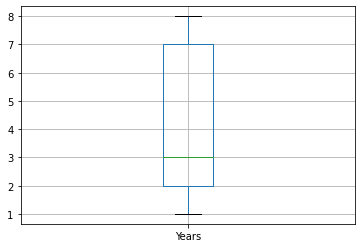

In [26]:
boxplot = employee.boxplot(column=['Years'])

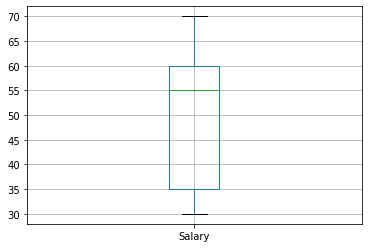

In [27]:
boxplot = employee.boxplot(column=[ 'Salary'])

In [28]:
# print first quartile here
for col in ["Years", "Salary"]:
    p25=employee[col].describe()["25%"]
    print(f" Column {col} ---- 1st first (25%) : {p25} ")

 Column Years ---- 1st first (25%) : 2.0 
 Column Salary ---- 1st first (25%) : 35.0 


In [29]:
# print third quartile here
for col in ["Years", "Salary"]:
    p75=employee[col].describe()["75%"]
    print(f" Column {col} ----   3st quartile (75%) : {p75}")

 Column Years ----   3st quartile (75%) : 7.0
 Column Salary ----   3st quartile (75%) : 60.0


#### Is the mean salary per gender different?

In [30]:
employee.groupby(by = "Gender")["Salary"].mean()
#Yes, is slightly different, higher in the male category

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [31]:
# your answer here
for dep in employee["Title"].unique():
    for el in ["Years", "Salary"]:
        val_min = employee[employee["Title"] == dep][el].min()
        val_mean = employee[employee["Title"] == dep][el].mean()
        val_max = employee[employee["Title"] == dep][el].max()
        print(f" {el}, {dep}:  Min={round(val_min,2)}, Max={round(val_max,2)}, Mean={round(val_mean,2)}")

 Years, analyst:  Min=1, Max=4, Mean=2.25
 Salary, analyst:  Min=30, Max=35, Mean=32.5
 Years, associate:  Min=2, Max=7, Mean=4.0
 Salary, associate:  Min=55, Max=60, Mean=56.67
 Years, VP:  Min=8, Max=8, Mean=8.0
 Salary, VP:  Min=70, Max=70, Mean=70.0


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
"""
#Alternative
for dep in employee["Title"].unique():
    val_min = employee[employee["Title"] == dep]["Salary"].min()
    val_max = employee[employee["Title"] == dep]["Salary"].max()
    print(f"{dep.upper()}:  {round(val_max-val_min,2)}")
"""   

temporal = employee.groupby('Title').agg(['min', 'max'])
temporal["Difference"]=temporal["Salary"]["max"]-temporal["Salary"]["min"]
temporal

Name         Department        Education         Gender     Years  \
             min     max        min    max       min     max    min max   min   
Title                                                                           
VP           Ana  Carlos         HR     IT    Master  Master      F   M     8   
analyst    David   Sonia         HR     IT  Bachelor  Master      F   M     1   
associate    Eva  Samuel         IT  Sales  Bachelor     Phd      F   M     2   

              Salary     Difference  
          max    min max             
Title                                
VP          8     70  70          0  
analyst     4     30  35          5  
associate   7     55  60          5

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [33]:
orders = pd.read_csv('Orders.zip')
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [34]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [35]:
# This dataset seems to be the sales orders between 2010 and 2011

####  What is the average Purchase Price?

In [36]:
orders["amount_spent"].mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [37]:
print(orders["amount_spent"].min())
print(orders[orders["amount_spent"] >0 ]["amount_spent"].min(), " without considering the 0")

0.0
0.001  without considering the 0


In [38]:
orders["amount_spent"].max()

168469.6

#### Select all the customers we have in Spain

In [39]:
spain = orders[orders["Country"] == "Spain" ]

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [40]:
len(spain["CustomerID"].value_counts())

30

#### Select all the customers who have bought more than 50 items ?

In [41]:
ammount = orders.groupby(by=["CustomerID"]).sum()
ammount50 = ammount[ammount["Quantity"] > 50]

#### Select orders from Spain that are above 50 items

In [42]:
spain50 = orders[(orders["Country"] == "Spain") & (orders["Quantity"] > 50)]

#### Select all free orders

In [43]:
free = orders[orders["amount_spent"] == 0]

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [44]:
aa= 'lunch bag caca'
aa.find('lunch bag')

orders["lunch_bag"]=orders["Description"].apply(lambda x: x.find('lunch bag') >= 0)
lunchbag = orders[orders["lunch_bag"]]

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [45]:
lb_2011 = lunchbag[lunchbag["year"] == 2011]

#### Show the frequency distribution of the amount spent in Spain.

In [46]:
spain["amount_spent"].value_counts()

15.00     186
17.70     122
19.80      99
17.40      86
10.20      76
         ... 
29.85       1
7.56        1
280.00      1
360.00      1
4.74        1
Name: amount_spent, Length: 316, dtype: int64

#### Select all orders made in the month of August

In [47]:
aug = orders[orders["month"] == 8]

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [48]:
aug["Country"].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [49]:
orders.groupby(by=["Country"])["amount_spent"].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [50]:
orders[orders["UnitPrice"] ==  orders["UnitPrice"].max()]["Description"].values[0]

'postage'

#### What was the average amount spent per year ?

In [51]:
orders.groupby(by=["year"])["amount_spent"].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64